In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("covid_19_india.csv")
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
16521,16522,2021-06-28,8:00 AM,Telangana,-,-,602676,3635,620613
16522,16523,2021-06-28,8:00 AM,Tripura,-,-,60694,672,64863
16523,16524,2021-06-28,8:00 AM,Uttarakhand,-,-,330066,7088,339619
16524,16525,2021-06-28,8:00 AM,Uttar Pradesh,-,-,1679913,22518,1705596


In [3]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****'],
      dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16526 entries, 0 to 16525
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       16526 non-null  int64 
 1   Date                      16526 non-null  object
 2   Time                      16526 non-null  object
 3   State/UnionTerritory      16526 non-null  object
 4   ConfirmedIndianNational   16526 non-null  object
 5   ConfirmedForeignNational  16526 non-null  object
 6   Cured                     16526 non-null  int64 
 7   Deaths                    16526 non-null  int64 
 8   Confirmed                 16526 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.1+ MB


# There is no null value or missing value in the data

In [5]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,16526.00000,1.652600e+04,16526.000000,1.652600e+04
mean,8263.50000,2.245460e+05,3335.160535,2.468239e+05
std,4770.78961,4.954535e+05,8890.528989,5.414044e+05
min,1.00000,0.000000e+00,0.000000,0.000000e+00
25%,4132.25000,2.451500e+03,20.000000,3.454250e+03
50%,8263.50000,2.782500e+04,416.000000,3.280650e+04
75%,12394.75000,2.463522e+05,2973.500000,2.622882e+05
max,16526.00000,5.790113e+06,121286.000000,6.036821e+06


In [6]:
# get the data of particular state, i choose karnataka
kar=df.groupby('State/UnionTerritory').get_group('Karnataka')

In [7]:
kar.Cured.diff()

74          NaN
89          0.0
108         0.0
119         0.0
132         0.0
          ...  
16361    6455.0
16397    9768.0
16433    6524.0
16469    6126.0
16505    7699.0
Name: Cured, Length: 477, dtype: float64

In [8]:
# as data is cumulative sum so we do this
kar['kw_Cured']=kar.Cured.diff()
kar['kw_Deaths']=kar.Deaths.diff()
kar['kw_Confirmed']=kar.Confirmed.diff()

<ipython-input-8-30d64a1cfc29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kar['kw_Cured']=kar.Cured.diff()
<ipython-input-8-30d64a1cfc29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kar['kw_Deaths']=kar.Deaths.diff()
<ipython-input-8-30d64a1cfc29>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [9]:
kar.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,kw_Cured,kw_Deaths,kw_Confirmed
74,75,2020-03-09,6:00 PM,Karnataka,1,0,0,0,1,NaN,NaN,NaN
89,90,2020-03-10,6:00 PM,Karnataka,4,0,0,0,4,0.0,0.0,3.0
108,109,2020-03-11,6:00 PM,Karnataka,4,0,0,0,4,0.0,0.0,0.0
119,120,2020-03-12,6:00 PM,Karnataka,4,0,0,0,4,0.0,0.0,0.0
132,133,2020-03-13,6:00 PM,Karnataka,6,0,0,1,6,0.0,1.0,2.0


In [10]:
# fill the nan value by 0
kar.fillna(0,inplace=True)

C:\Users\pc\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


# now plot the barplot of confirmed cases, deaths cases,cured cases

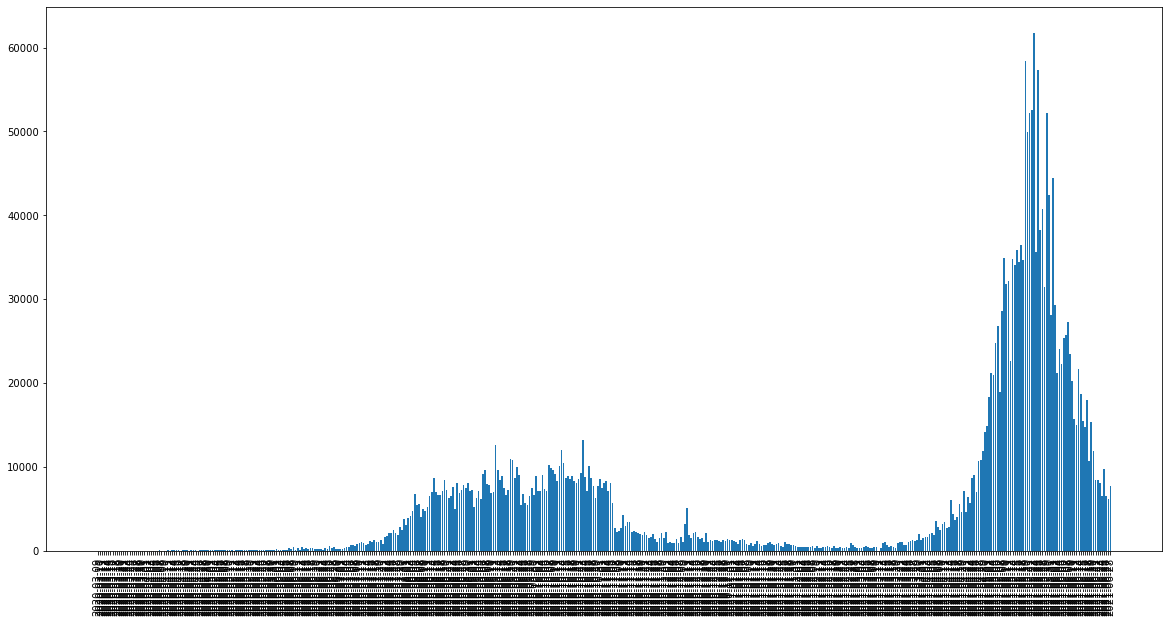

In [11]:
plt.figure(figsize=(20,10))
plt.bar(kar['Date'],kar['kw_Cured'])
plt.xticks(rotation=90);

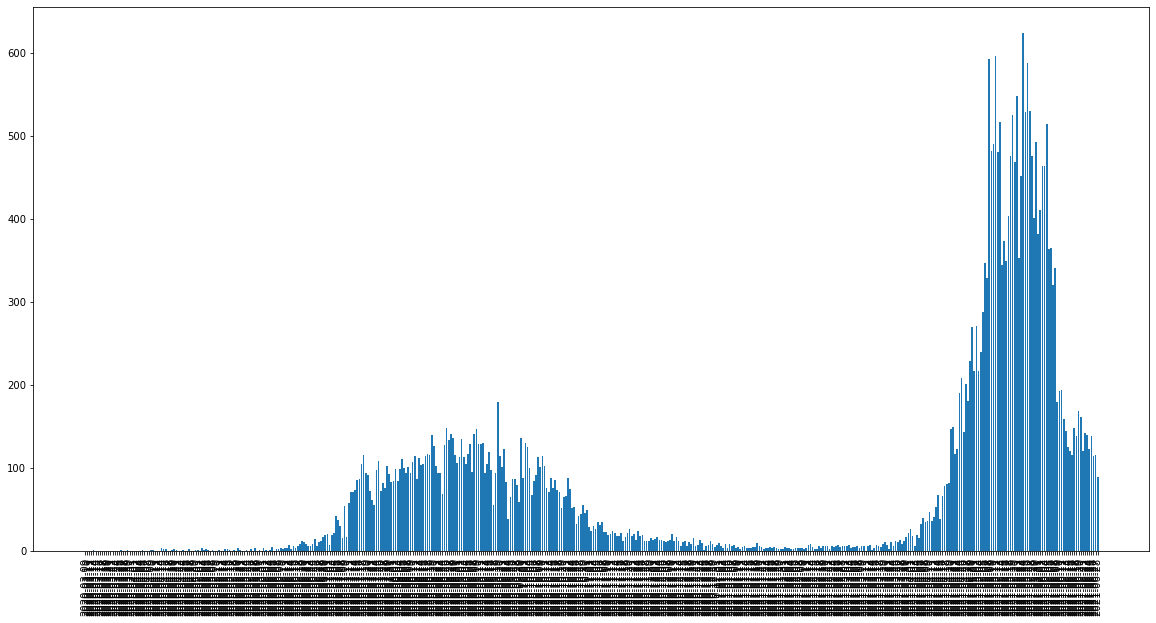

In [12]:
plt.figure(figsize=(20,10))
plt.bar(kar['Date'],kar['kw_Deaths'])
plt.xticks(rotation=90);

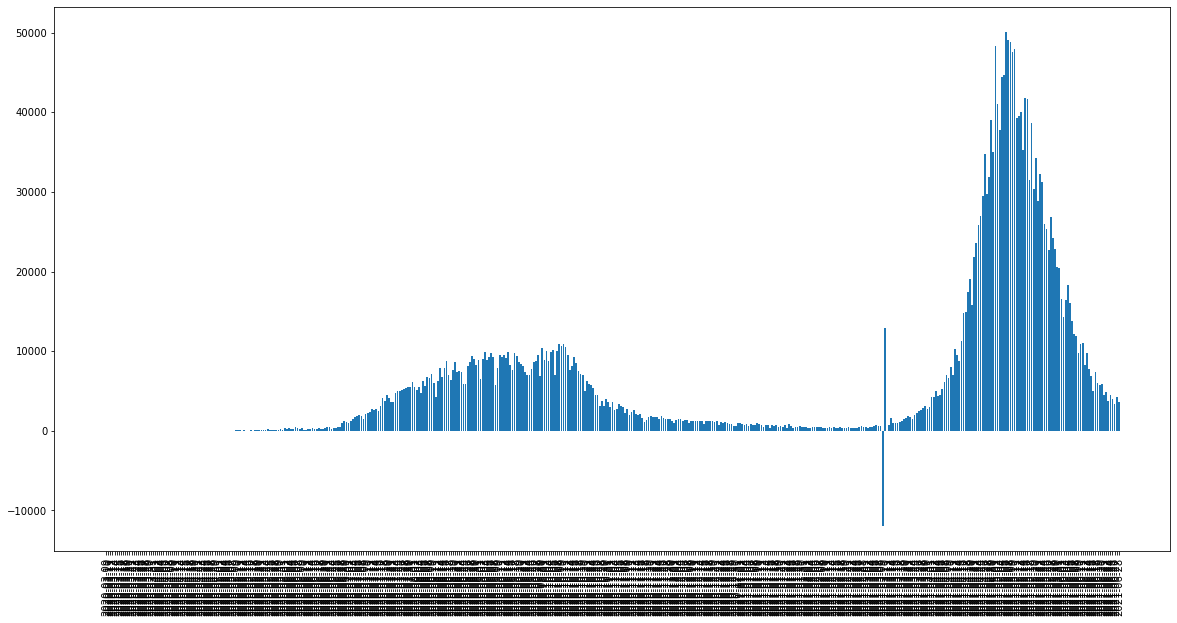

In [13]:
plt.figure(figsize=(20,10))
plt.bar(kar['Date'],kar['kw_Confirmed'])
plt.xticks(rotation=90);

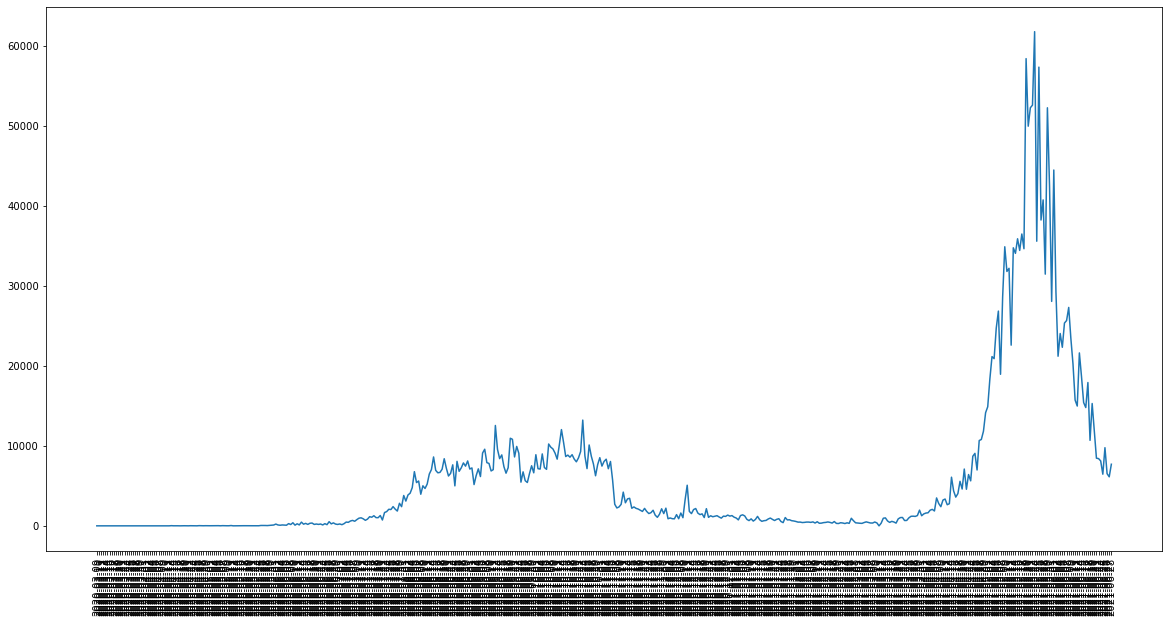

In [14]:
plt.figure(figsize=(20,10))
plt.plot(kar['Date'],kar['kw_Cured'])
plt.xticks(rotation=90);

In [15]:
# check the date type
kar.Date.dtype

dtype('O')

In [16]:
kar['Date']=pd.to_datetime(kar.Date)

<ipython-input-16-90ee66f75f13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kar['Date']=pd.to_datetime(kar.Date)


In [17]:
# now analyse the data weekly
temp=kar.groupby(pd.Grouper(key='Date',freq='W')).sum()
temp

,Sno,Cured,Deaths,Confirmed,kw_Cured,kw_Deaths,kw_Confirmed
Date,,,,,,,
2020-03-15,825,0,3,31,0.0,1.0,5.0
2020-03-22,1524,4,7,98,2.0,0.0,20.0
2020-03-29,2643,22,12,352,3.0,2.0,50.0
2020-04-05,4011,61,22,773,7.0,1.0,68.0
2020-04-12,5496,194,35,1319,25.0,2.0,82.0
...,...,...,...,...,...,...,...
2021-06-06,109242,16159894,210026,18452389,194694.0,2962.0,115865.0
2021-06-13,111006,17326665,225807,19092694,148961.0,1528.0,74010.0
2021-06-20,112770,18172053,233189,19486863,104560.0,975.0,44612.0


# plot of confirmed,cured,deaths cases weekly

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


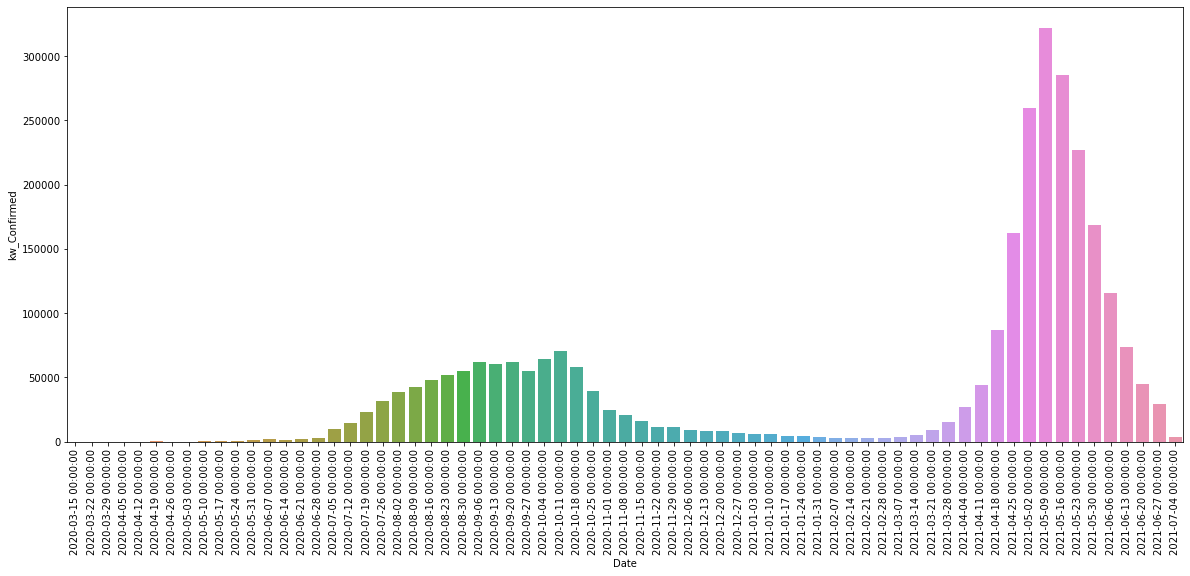

In [18]:
plt.figure(figsize=(20,8))
sns.barplot(temp.index,temp.kw_Confirmed)
plt.xticks(rotation=90);

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


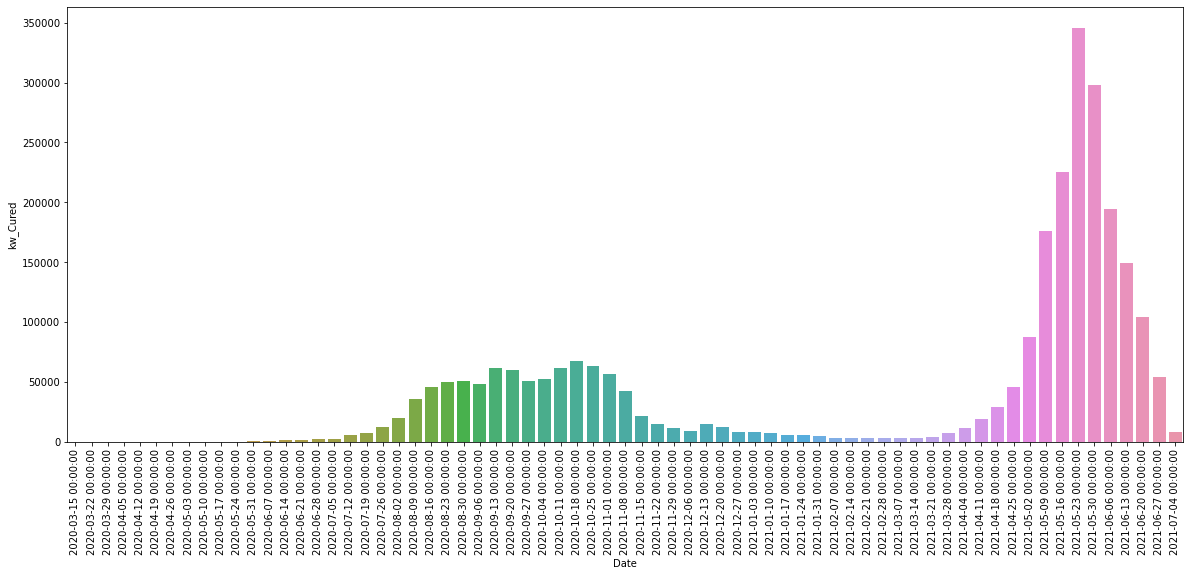

In [19]:
plt.figure(figsize=(20,8))
sns.barplot(temp.index,temp.kw_Cured)
plt.xticks(rotation=90);

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


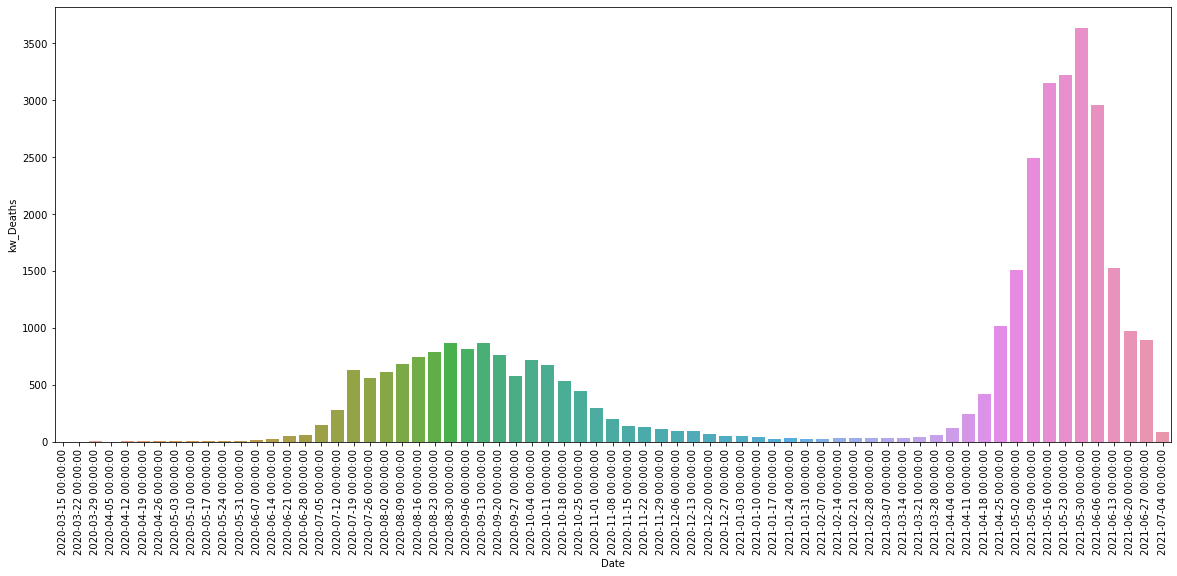

In [20]:
plt.figure(figsize=(20,8))
sns.barplot(temp.index,temp.kw_Deaths)
plt.xticks(rotation=90);

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


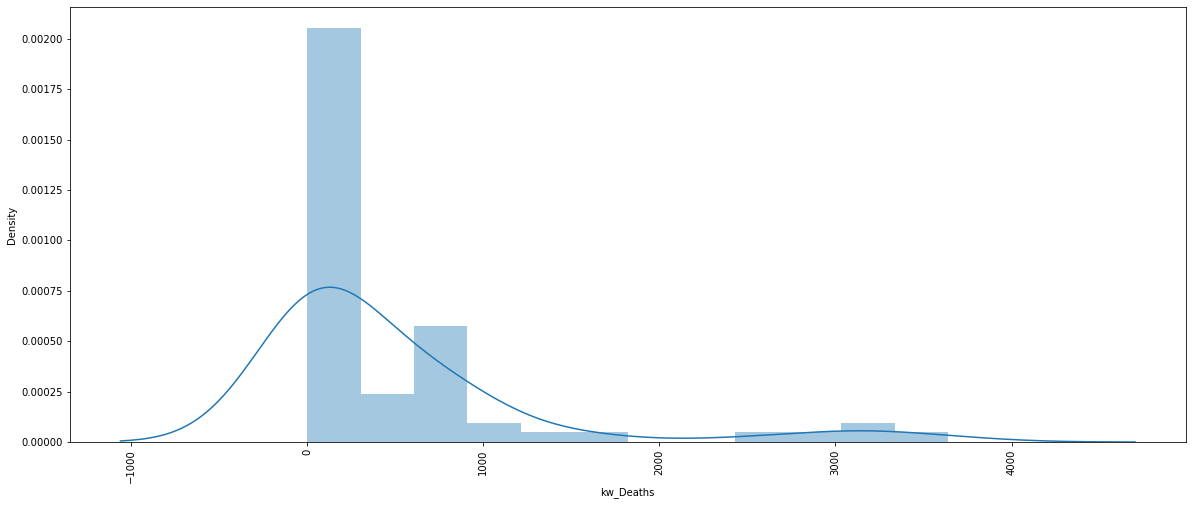

In [21]:
plt.figure(figsize=(20,8))
sns.distplot(temp['kw_Deaths'])
plt.xticks(rotation=90);

In [22]:
df.Date.max()

'2021-06-28'

In [24]:
temp2=df[df.Date==df.Date.max()]
temp2

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
16490,16491,2021-06-28,8:00 AM,Andaman and Nicobar Islands,-,-,7266,127,7455
16491,16492,2021-06-28,8:00 AM,Andhra Pradesh,-,-,1822500,12599,1879872
16492,16493,2021-06-28,8:00 AM,Arunachal Pradesh,-,-,32270,167,34932
16493,16494,2021-06-28,8:00 AM,Assam,-,-,469067,4440,500644
16494,16495,2021-06-28,8:00 AM,Bihar,-,-,709578,9579,721299
16495,16496,2021-06-28,8:00 AM,Chandigarh,-,-,60614,807,61624
16496,16497,2021-06-28,8:00 AM,Chhattisgarh,-,-,973262,13431,993289
16497,16498,2021-06-28,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,-,-,10490,4,10539
16498,16499,2021-06-28,8:00 AM,Delhi,-,-,1407401,24965,1433934
16499,16500,2021-06-28,8:00 AM,Goa,-,-,160548,3039,166098


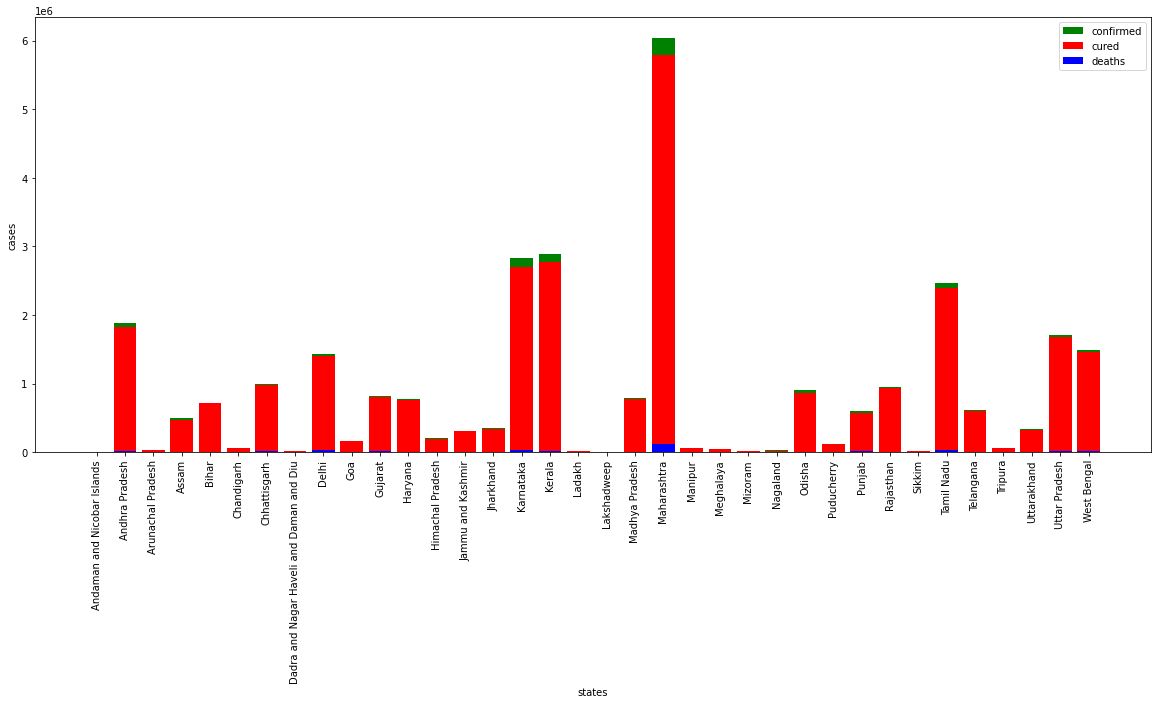

In [58]:
plt.figure(figsize=(20,8))
plt.bar(temp2['State/UnionTerritory'],temp2['Confirmed'],color='g')
plt.bar(temp2['State/UnionTerritory'],temp2['Cured'],color='r')
plt.bar(temp2['State/UnionTerritory'],temp2['Deaths'],color='b')
plt.xlabel("states")
plt.ylabel("cases")
plt.legend(['confirmed','cured','deaths'])
plt.xticks(rotation=90);

# analyse the data monthly

In [27]:
temp3=kar.groupby(pd.Grouper(key='Date',freq='M')).sum()
temp3.head()

,Sno,Cured,Deaths,Confirmed,kw_Cured,kw_Deaths,kw_Confirmed
Date,,,,,,,
2020-03-31,5990,36,28,647,5.0,3.0,82.0
2020-04-30,29867,2603,332,9382,218.0,18.0,474.0
2020-05-31,61623,15907,1103,41184,774.0,27.0,2365.0
2020-06-30,91820,123411,3181,225375,6686.0,178.0,11373.0
2020-07-31,128851,654458,32446,1705708,39011.0,2004.0,104337.0


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


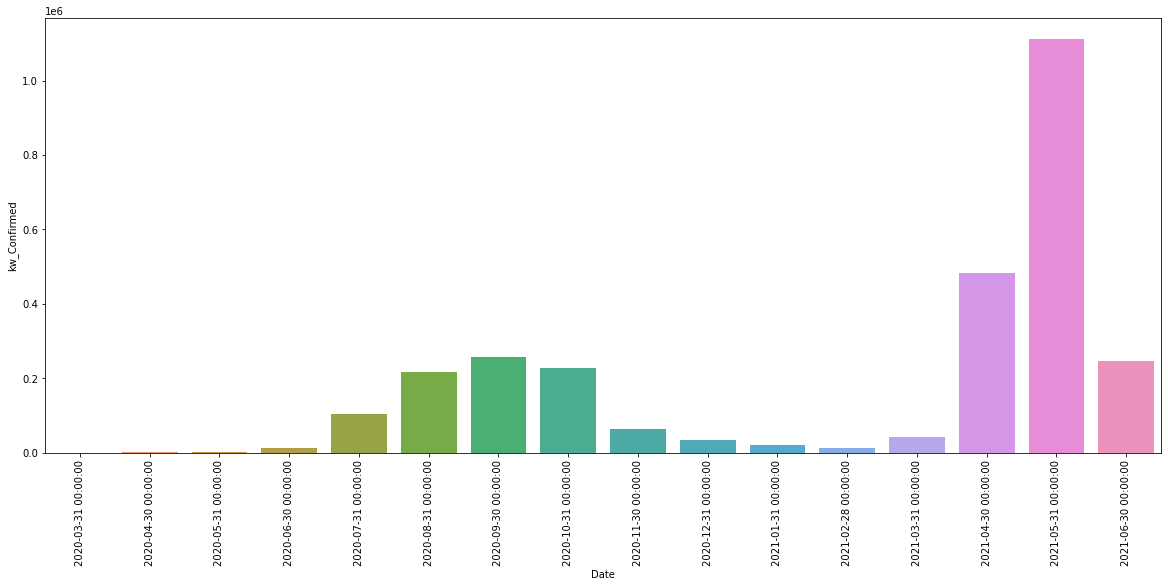

In [28]:
plt.figure(figsize=(20,8))
sns.barplot(temp3.index,temp3.kw_Confirmed)
plt.xticks(rotation=90);

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


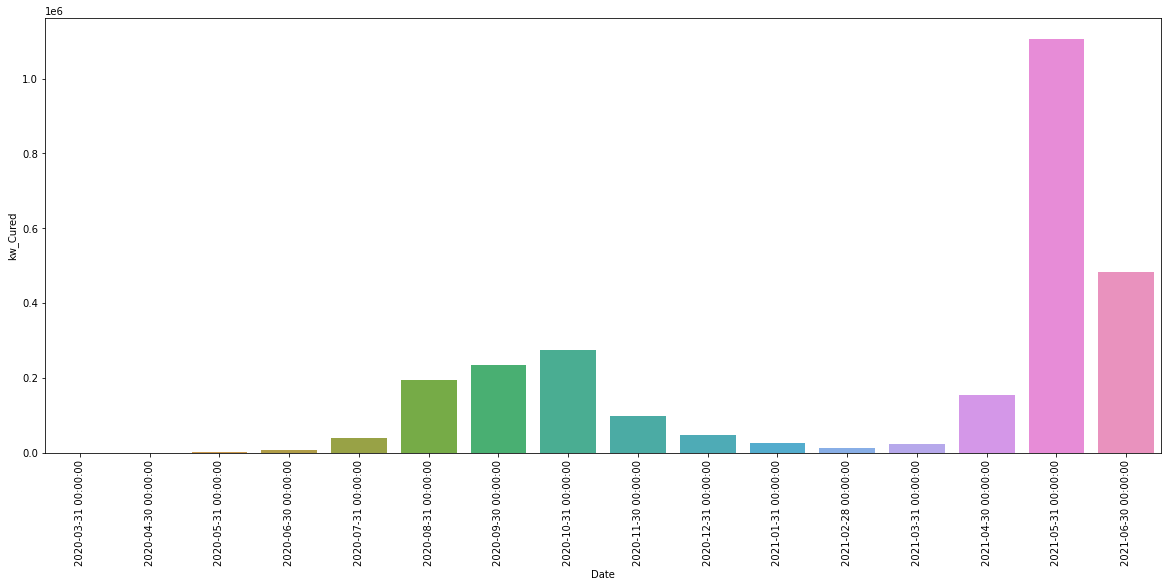

In [29]:
plt.figure(figsize=(20,8))
sns.barplot(temp3.index,temp3.kw_Cured)
plt.xticks(rotation=90);

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


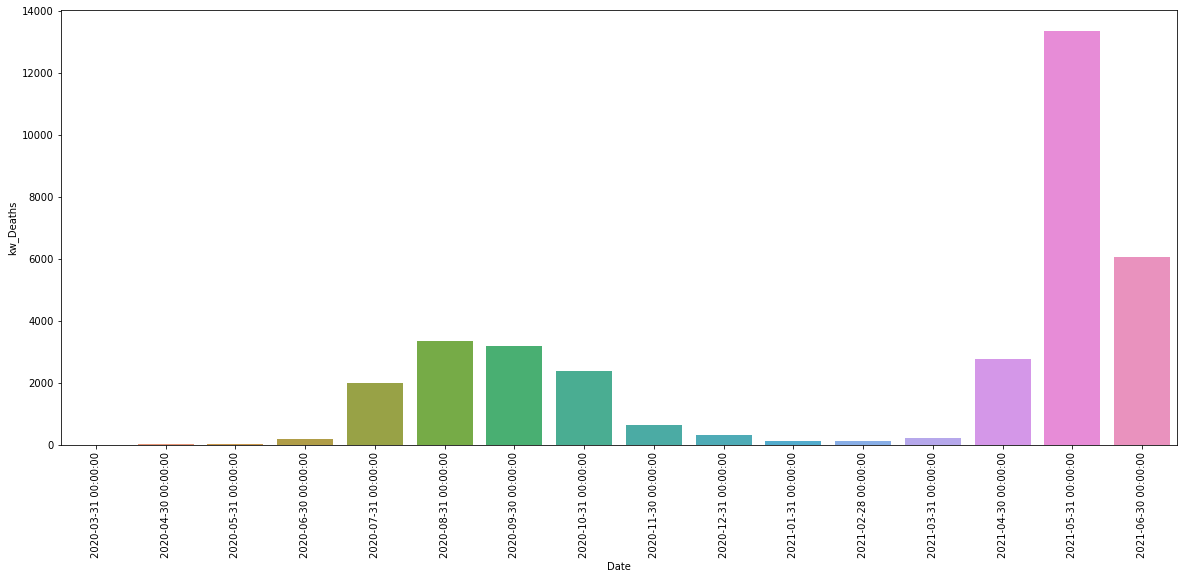

In [30]:
plt.figure(figsize=(20,8))
sns.barplot(temp3.index,temp3.kw_Deaths)
plt.xticks(rotation=90);

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


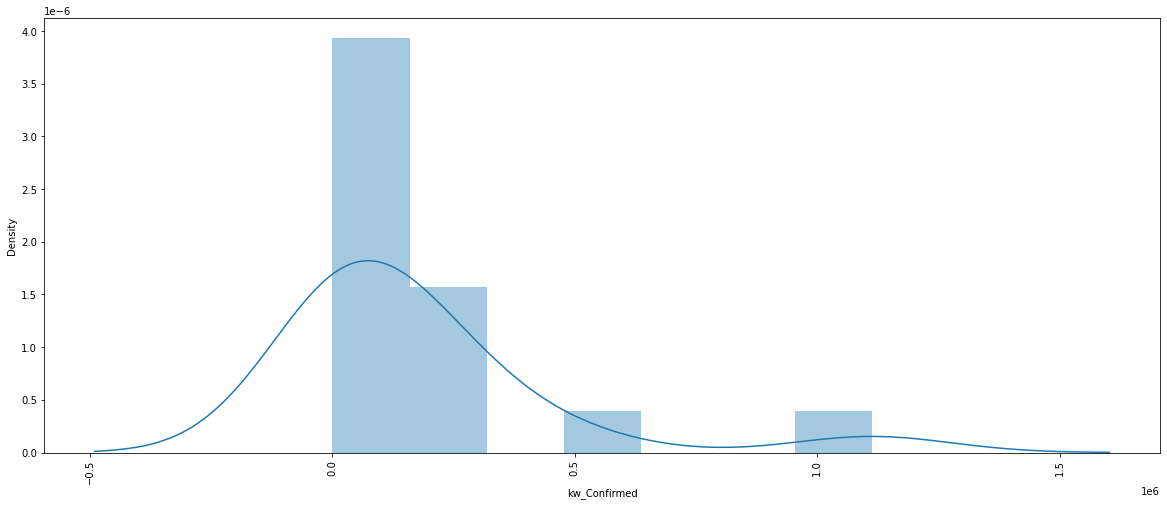

In [31]:
plt.figure(figsize=(20,8))
sns.distplot(temp3['kw_Confirmed'])
plt.xticks(rotation=90);

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


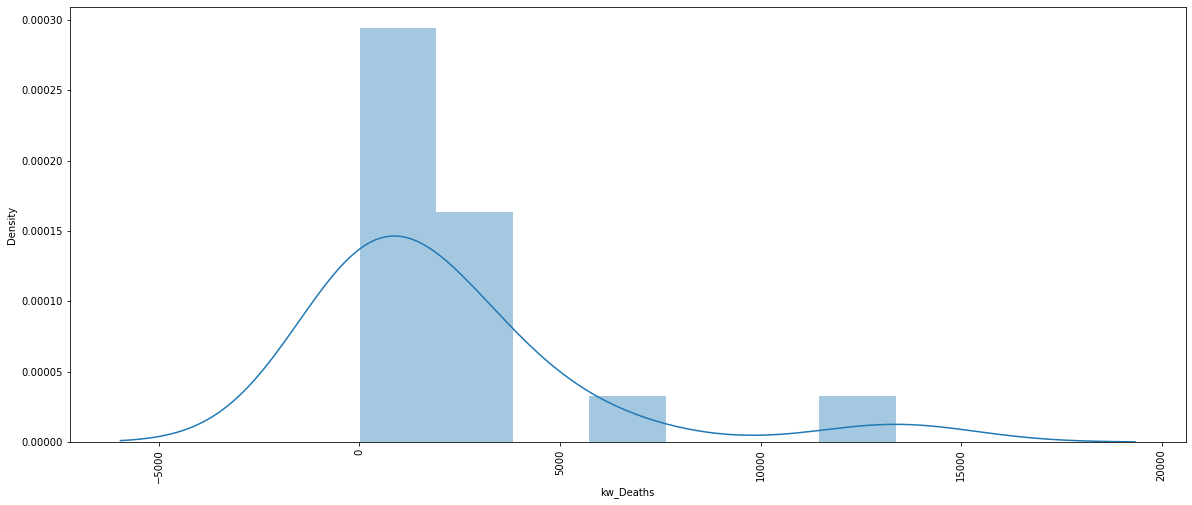

In [32]:
plt.figure(figsize=(20,8))
sns.distplot(temp3['kw_Deaths'])
plt.xticks(rotation=90);

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


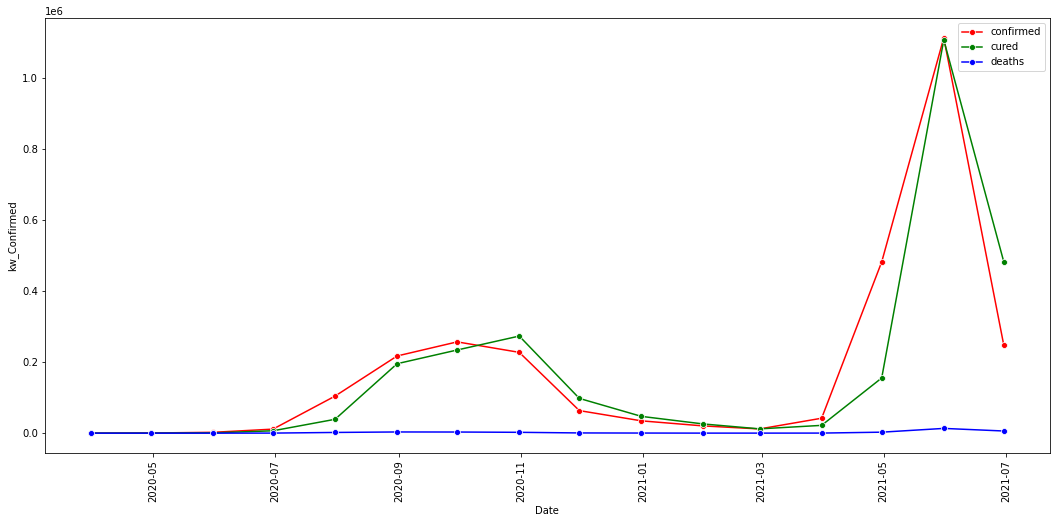

In [33]:
plt.figure(figsize=(18,8))
sns.lineplot(temp3.index,temp3.kw_Confirmed,color='r',marker='o')
sns.lineplot(temp3.index,temp3.kw_Cured,color='g',marker='o')
sns.lineplot(temp3.index,temp3.kw_Deaths,color='b',marker='o')
plt.xticks(rotation=90)
plt.legend(['confirmed','cured','deaths']);

# now we see the affect of weather on the covid cases or on data

In [34]:
df1=pd.read_excel(r"C:\Users\pc\climate data\combined data.xlsx")
df1

,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,RA,SN,TS,FG
0,26.4,33.3,21.6,-,57.0,0,6.9,2,5.4,-,NaN,NaN,NaN,NaN
1,27.0,32.9,22.4,_,47.0,0,6.9,1.9,3.5,_,NaN,NaN,NaN,NaN
2,26.9,34,22.3,_,47.0,0,6.3,3,5.4,_,NaN,NaN,NaN,NaN
3,26.3,33.6,22.0,_,49.0,0,6.9,2,5.4,_,NaN,NaN,NaN,NaN
4,26.4,34.4,21.0,-,42.0,0,7.7,1.9,3.5,-,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,26.2,32.1,21.4,-,68.0,0,6.9,9.3,18.3,-,NaN,NaN,NaN,NaN
445,26.8,NaN,NaN,NaN,75.0,NaN,NaN,10.5,NaN,NaN,NaN,NaN,NaN,NaN
446,24.7,NaN,NaN,NaN,79.0,NaN,NaN,7.6,NaN,NaN,NaN,NaN,NaN,NaN
447,23.1,NaN,NaN,NaN,81.0,NaN,NaN,7.1,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df1.drop(['TM','Tm','SLP','PP','VV','VM','VG','RA','SN','TS','FG'],axis=1,inplace=True)

In [36]:
df1.isnull().sum()

T    0
H    0
V    0
dtype: int64

In [37]:
df2=df1.rename(columns={"T":"Temperature","H":"Humidity","V":"Windspeed"})

In [38]:
df2.isnull().sum()

Temperature    0
Humidity       0
Windspeed      0
dtype: int64

# now add date column to the weather dataset

In [39]:
df1_date=pd.date_range(start='03/09/2020',end='31/05/2021')

In [40]:
df1_date.value_counts().sum()

449

In [41]:
df1_date

DatetimeIndex(['2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18',
               ...
               '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
               '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
               '2021-05-30', '2021-05-31'],
              dtype='datetime64[ns]', length=449, freq='D')

In [42]:
df2["Day"]=df1_date

In [44]:
df2["Day"]=pd.to_datetime(df2.Day)
df3=df2.rename(columns={"Day":"Date"})
df3.head()

,Temperature,Humidity,Windspeed,Date
0,26.4,57.0,2,2020-03-09
1,27.0,47.0,1.9,2020-03-10
2,26.9,47.0,3,2020-03-11
3,26.3,49.0,2,2020-03-12
4,26.4,42.0,1.9,2020-03-13


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


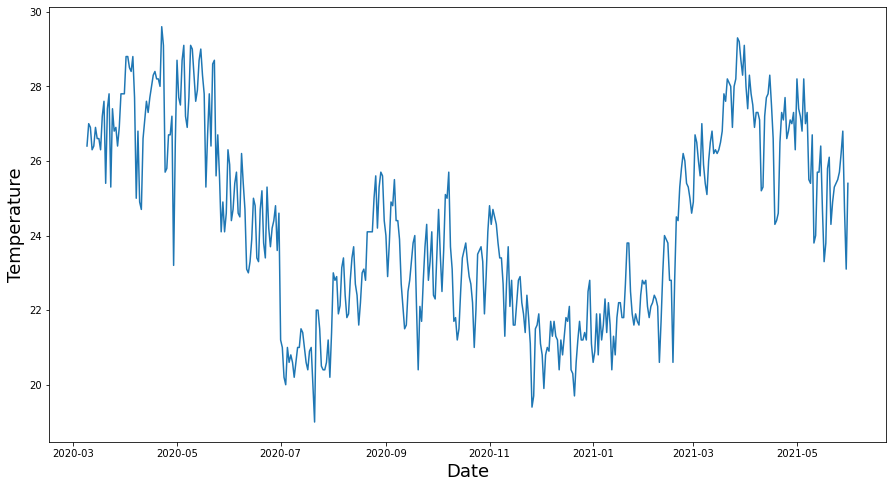

In [45]:
plt.figure(figsize=(15,8))
sns.lineplot(df3.Date,df3.Temperature)
plt.xlabel("Date",fontsize=18)
plt.ylabel("Temperature",fontsize=18);

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


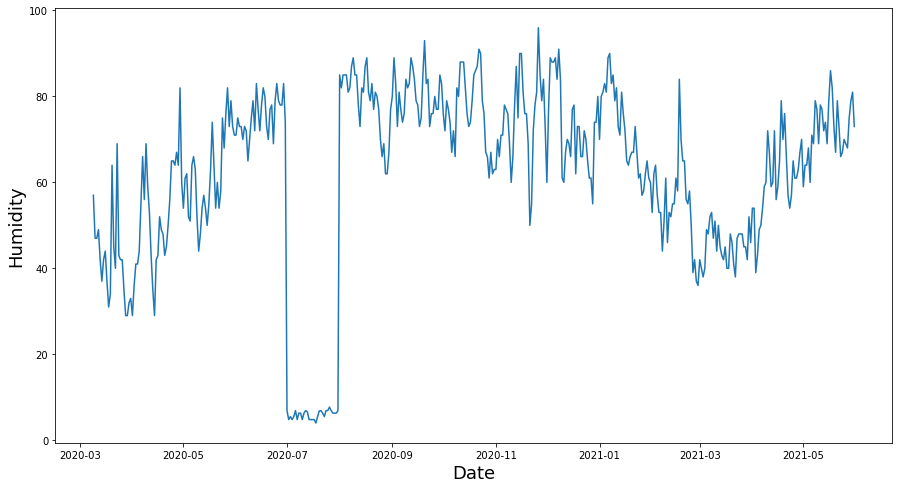

In [46]:
plt.figure(figsize=(15,8))
sns.lineplot(df3.Date,df3.Humidity)
plt.xlabel("Date",fontsize=18)
plt.ylabel("Humidity",fontsize=18);

In [47]:
kar1=kar.drop(['Cured','Deaths','Confirmed','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1)
kar1.head()

,Sno,Date,Time,State/UnionTerritory,kw_Cured,kw_Deaths,kw_Confirmed
74,75,2020-03-09,6:00 PM,Karnataka,0.0,0.0,0.0
89,90,2020-03-10,6:00 PM,Karnataka,0.0,0.0,3.0
108,109,2020-03-11,6:00 PM,Karnataka,0.0,0.0,0.0
119,120,2020-03-12,6:00 PM,Karnataka,0.0,0.0,0.0
132,133,2020-03-13,6:00 PM,Karnataka,0.0,1.0,2.0


In [48]:
kar1.drop(kar1.tail(28).index,inplace=True)

In [49]:
kar['Date'].dtype

dtype('<M8[ns]')

# merge both dataset

In [50]:
df6=pd.merge_asof(kar1,df3,on='Date')
df6.head()

,Sno,Date,Time,State/UnionTerritory,kw_Cured,kw_Deaths,kw_Confirmed,Temperature,Humidity,Windspeed
0,75,2020-03-09,6:00 PM,Karnataka,0.0,0.0,0.0,26.4,57.0,2
1,90,2020-03-10,6:00 PM,Karnataka,0.0,0.0,3.0,27.0,47.0,1.9
2,109,2020-03-11,6:00 PM,Karnataka,0.0,0.0,0.0,26.9,47.0,3
3,120,2020-03-12,6:00 PM,Karnataka,0.0,0.0,0.0,26.3,49.0,2
4,133,2020-03-13,6:00 PM,Karnataka,0.0,1.0,2.0,26.4,42.0,1.9


In [51]:
df6.isnull().sum()

Sno                     0
Date                    0
Time                    0
State/UnionTerritory    0
kw_Cured                0
kw_Deaths               0
kw_Confirmed            0
Temperature             0
Humidity                0
Windspeed               0
dtype: int64

In [52]:
df6.duplicated().sum()

0

In [53]:
df6['Date'].dtype

dtype('<M8[ns]')

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


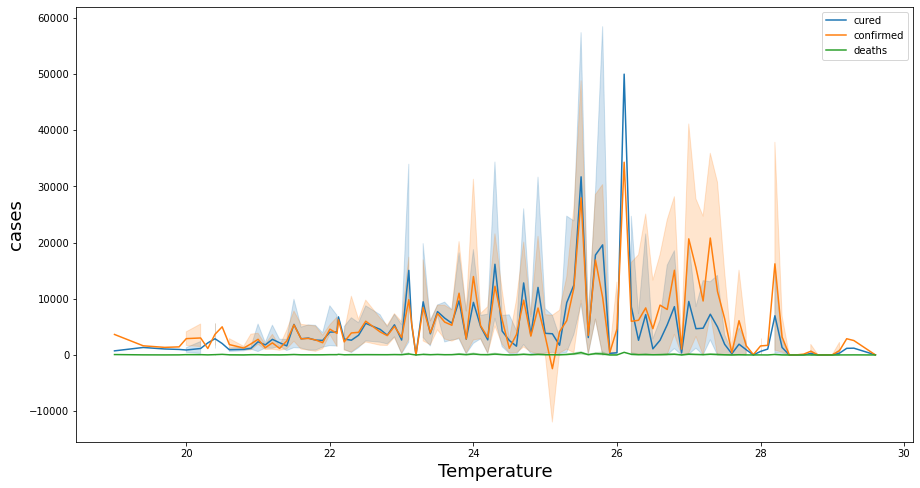

In [54]:
plt.figure(figsize=(15,8))
sns.lineplot(df6.Temperature,df6.kw_Cured)
sns.lineplot(df6.Temperature,df6.kw_Confirmed)
sns.lineplot(df6.Temperature,df6.kw_Deaths)
plt.xlabel("Temperature",fontsize=18)
plt.ylabel("cases",fontsize=18);
plt.legend(["cured","confirmed","deaths"])

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-

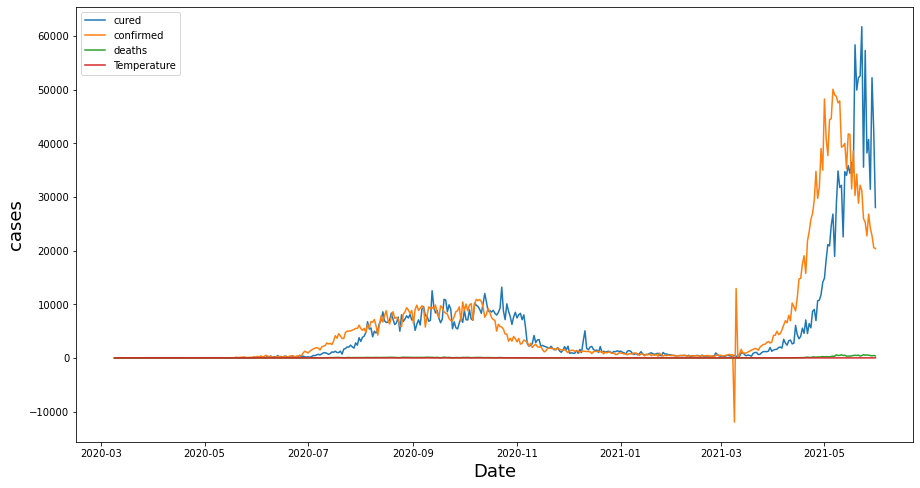

In [55]:
plt.figure(figsize=(15,8))
sns.lineplot(df6.Date,df6.kw_Cured)
sns.lineplot(df6.Date,df6.kw_Confirmed)
sns.lineplot(df6.Date,df6.kw_Deaths)
sns.lineplot(df6.Date,df6.Temperature)
plt.xlabel("Date",fontsize=18)
plt.ylabel("cases",fontsize=18);
plt.legend(["cured","confirmed","deaths","Temperature"])

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


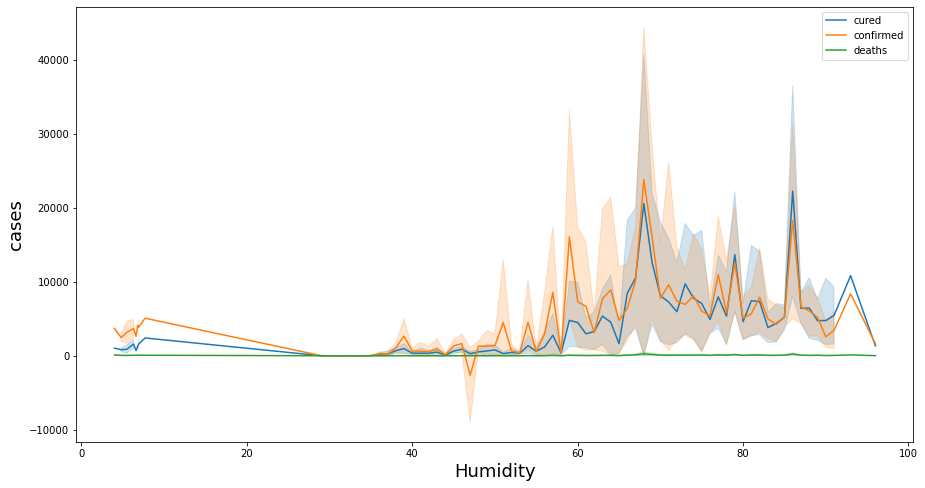

In [56]:
plt.figure(figsize=(15,8))
sns.lineplot(df6.Humidity,df6.kw_Cured)
sns.lineplot(df6.Humidity,df6.kw_Confirmed)
sns.lineplot(df6.Humidity,df6.kw_Deaths)
plt.xlabel("Humidity",fontsize=18)
plt.ylabel("cases",fontsize=18);
plt.legend(["cured","confirmed","deaths"])

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-

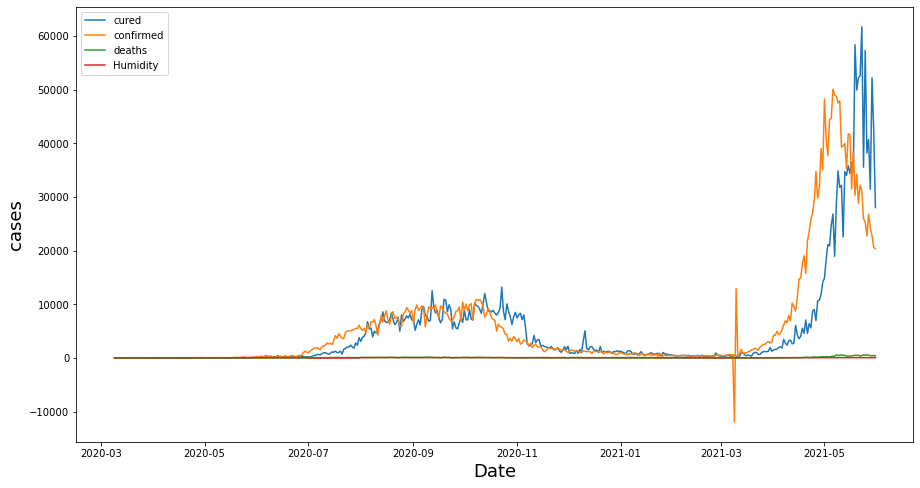

In [57]:
plt.figure(figsize=(15,8))
sns.lineplot(df6.Date,df6.kw_Cured)
sns.lineplot(df6.Date,df6.kw_Confirmed)
sns.lineplot(df6.Date,df6.kw_Deaths)
sns.lineplot(df6.Date,df6.Humidity)
plt.xlabel("Date",fontsize=18)
plt.ylabel("cases",fontsize=18);
plt.legend(["cured","confirmed","deaths","Humidity"])